<a href="https://colab.research.google.com/github/jhjoGit/Portfolio/blob/gh-pages/CV_%ED%85%80%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

구글 드라이브 연동 및 경로 설정


In [14]:
from google.colab import drive
drive.mount('/gdrive')

import os
workspace_path = '/gdrive/My Drive/Colab Notebooks/CV/CV_텀프로젝트'  # 저장 경로
dataset_path = os.path.join(workspace_path, 'dataset')
dataset_path = os.path.join(dataset_path, 'test/images')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


yolov5 다운로드

In [15]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


패키지 설치

In [ ]:
%cd /content/yolov5/
!pip install -r requirements.txt
!pip install pyyaml==5.4.1

train set, valid set 불러오기

In [17]:
from glob import glob

train_img_list = glob('/gdrive/MyDrive/Colab Notebooks/CV/CV_텀프로젝트/dataset/train/images/*.jpg')
val_img_list = glob('/gdrive/MyDrive/Colab Notebooks/CV/CV_텀프로젝트/dataset/valid/images/*.jpg')
print(len(train_img_list), len(val_img_list))

105 29


In [18]:
with open('/gdrive/MyDrive/Colab Notebooks/CV/CV_텀프로젝트/dataset/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')
with open('/gdrive/MyDrive/Colab Notebooks/CV/CV_텀프로젝트/dataset/val.txt', 'w') as f:
    f.write('\n'.join(val_img_list) + '\n')

In [19]:
import yaml

with open('/gdrive/MyDrive/Colab Notebooks/CV/CV_텀프로젝트/dataset/data.yaml', 'r') as f:
    data = yaml.full_load(f)
print(data)

data['train'] = '/gdrive/MyDrive/Colab Notebooks/CV/CV_텀프로젝트/dataset/train.txt'
data['val'] = '/gdrive/MyDrive/Colab Notebooks/CV/CV_텀프로젝트/dataset/val.txt'

with open('/gdrive/MyDrive/Colab Notebooks/CV/CV_텀프로젝트/dataset/data.yaml', 'w') as f:
    yaml.dump(data, f)

print(data)

{'names': ['mask', 'no-mask'], 'nc': 2, 'train': '/gdrive/MyDrive/Colab Notebooks/CV/CV_텀프로젝트/dataset/train.txt', 'val': '/gdrive/MyDrive/Colab Notebooks/CV/CV_텀프로젝트/dataset/val.txt'}
{'names': ['mask', 'no-mask'], 'nc': 2, 'train': '/gdrive/MyDrive/Colab Notebooks/CV/CV_텀프로젝트/dataset/train.txt', 'val': '/gdrive/MyDrive/Colab Notebooks/CV/CV_텀프로젝트/dataset/val.txt'}


학습
python train.py --img 640 --batch 16 --epochs 5 --data coco128.yaml --weights yolov5s.pt

In [ ]:
%cd /content/yolov5/

!python train.py --img 416 --batch 16 --epochs 100 --data '/gdrive/MyDrive/Colab Notebooks/CV/CV_텀프로젝트/dataset/data.yaml' --cfg /content/yolov5/models/yolov5s.yaml --weights yolov5s.pt --name mask_yolov5s_results

detect: weights=['/content/yolov5/runs/train/mask_yolov5s_results/weights/best.pt'], source=/gdrive/MyDrive/Colab Notebooks/CV/CV_텀프로젝트/dataset/valid/images/1197620896_jpg.rf.161417d4b3eafad7376c0ed2f2d66f51.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-264-g2545628 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /gdrive/MyDrive/Colab Notebooks/CV/CV_텀프로젝트/dataset/valid/images/1197620896_jpg.rf.161417d4b3eafad7376c0ed2f2d66f51.jpg: 416x416 3 masks, Done. (0.014s)
Speed: 0.3ms pre-process, 13.6ms inference, 1.5ms NMS per image a

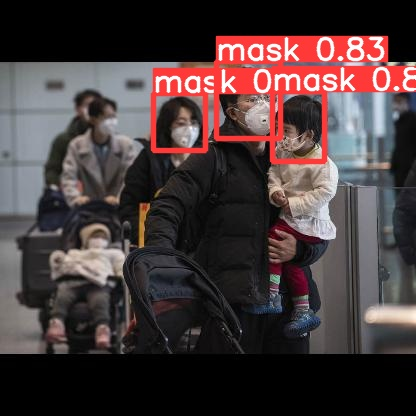

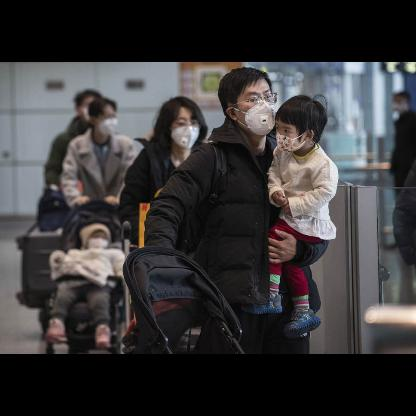

In [21]:
from IPython.display import Image

val_img_path = val_img_list[0]

!python detect.py --weights /content/yolov5/runs/train/mask_yolov5s_results/weights/best.pt --img 416 --conf 0.5 --source "{val_img_path}"
display(Image(os.path.join('/content/yolov5/runs/detect/exp', os.path.basename(val_img_path))))
display(Image(val_img_path))